# Setup

In [ ]:
from google.colab import drive
import os

drive.mount('/content/gdrive')

os.chdir(os.path.join(os.getcwd(), 'gdrive', 'Shareddrives', 'anzi'))

Mounted at /content/gdrive


In [ ]:
from tensorflow.keras.models import load_model

model = load_model('/content/gdrive/Shareddrives/anzi/J/Models')

OSError: ignored

In [ ]:
!wget https://github.com/AndyChiangSH/CDGP/raw/main/datasets/CLOTH.zip

--2023-05-16 13:40:57--  https://github.com/AndyChiangSH/CDGP/raw/main/datasets/CLOTH.zip
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AndyChiangSH/CDGP/main/datasets/CLOTH.zip [following]
--2023-05-16 13:40:57--  https://raw.githubusercontent.com/AndyChiangSH/CDGP/main/datasets/CLOTH.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13458900 (13M) [application/zip]
Saving to: ‘CLOTH.zip.1’

CLOTH.zip.1         100%[===================>]  12.83M  61.2MB/s    in 0.2s    

2023-05-16 13:40:58 (61.2 MB/s) - ‘CLOTH.zip.1’ saved [13458900/13458900]



In [ ]:
!unzip ./CLOTH.zip -d ./CLOTH

In [ ]:
import json

with open("./CLOTH/CLOTH_train_cleaned.json", "r") as file:
    dataset = json.load(file)

print(len(dataset))
print(dataset[0])

76850
{'answer': 'sank', 'distractors': ['ached', 'beat', 'rose'], 'sentence': 'My heart  [MASK]  when I was asked to the back room by the immigration officer.'}


In [ ]:
from tqdm.notebook import tqdm
import os

input_list = list()
label_list = list()

for data in tqdm(dataset):
  answer = data["answer"]
  distractors = data["distractors"]
  sentence = data["sentence"]
  mask_sentence = sentence.replace("**blank**", "[MASK]")
  mask_sentence += " [SEP] " + answer
  for distractor in distractors:
    dis_sentence = mask_sentence.replace("[MASK]", distractor)
    input_list.append(mask_sentence)
    label_list.append(dis_sentence)

  0%|          | 0/76850 [00:00<?, ?it/s]

In [ ]:
print("input_list:", len(input_list))
print(input_list[:10])

input_list: 230550
['My heart  [MASK]  when I was asked to the back room by the immigration officer. [SEP] sank', 'My heart  [MASK]  when I was asked to the back room by the immigration officer. [SEP] sank', 'My heart  [MASK]  when I was asked to the back room by the immigration officer. [SEP] sank', 'My  [MASK]  , with his very American last name, had no trouble at all. [SEP] husband', 'My  [MASK]  , with his very American last name, had no trouble at all. [SEP] husband', 'My  [MASK]  , with his very American last name, had no trouble at all. [SEP] husband', "In fact, I am  [MASK]  American born and raised, but they weren't quite ready to let me in yet. [SEP] also", "In fact, I am  [MASK]  American born and raised, but they weren't quite ready to let me in yet. [SEP] also", "In fact, I am  [MASK]  American born and raised, but they weren't quite ready to let me in yet. [SEP] also", "The only reason was  [MASK]  they thought my name looked like the one of  someone  who's on their wante

In [ ]:
print(label_list[:10])

['My heart  ached  when I was asked to the back room by the immigration officer. [SEP] sank', 'My heart  beat  when I was asked to the back room by the immigration officer. [SEP] sank', 'My heart  rose  when I was asked to the back room by the immigration officer. [SEP] sank', 'My  son  , with his very American last name, had no trouble at all. [SEP] husband', 'My  daughter  , with his very American last name, had no trouble at all. [SEP] husband', 'My  friend  , with his very American last name, had no trouble at all. [SEP] husband', "In fact, I am  still  American born and raised, but they weren't quite ready to let me in yet. [SEP] also", "In fact, I am  already  American born and raised, but they weren't quite ready to let me in yet. [SEP] also", "In fact, I am  never  American born and raised, but they weren't quite ready to let me in yet. [SEP] also", "The only reason was  because  they thought my name looked like the one of  someone  who's on their wanted list and I had to wait 

# **Test of 學測:**

In [ ]:
from google.colab import files
upload = files.upload()

Saving new_compare.csv to new_compare.csv


In [ ]:
import pandas as pd
data = pd.read_csv('/content/gdrive/Shareddrives/anzi/new_compare.csv').to_dict('index')

In [ ]:
print(data[0])

{'Year': 111, 'ID': 1, 'Sentence': 'When Jeffery doesn’t feel like cooking, he often orders pizza online and has it [MASK] to his house.', 'Answer': 'B', 'A': 'advanced', 'B': 'delivered', 'C': 'offered', 'D': 'stretched', 'A_similarity': 0.946506679058075, 'B_similarity': 0.9999996423721312, 'C_similarity': 0.951103925704956, 'D_similarity': 0.9456362128257751}


In [ ]:
cands = []
refs = []
for i in data:
  sen = data[i]['Sentence']
  a = sen.replace("[MASK]", data[i]['A']) + " [SEP] " + data[i][data[i]['Answer'][:1]]
  b = sen.replace("[MASK]", data[i]['B']) + " [SEP] " + data[i][data[i]['Answer'][:1]]
  c = sen.replace("[MASK]", data[i]['C']) + " [SEP] " + data[i][data[i]['Answer'][:1]]
  d = sen.replace("[MASK]", data[i]['D']) + " [SEP] " + data[i][data[i]['Answer'][:1]]
  sen += " [SEP] " + data[i][data[i]['Answer'][:1]]
  cands.append(sen)
  cands.append(sen)
  cands.append(sen)
  if(data[i]['Answer'][:1] == 'A'):
    refs.append(b)
    refs.append(c)
    refs.append(d)
  elif(data[i]['Answer'][:1] == 'B'):
    refs.append(a)
    refs.append(c)
    refs.append(d)
  elif(data[i]['Answer'][:1] == 'C'):
    refs.append(a)
    refs.append(b)
    refs.append(d)
  elif(data[i]['Answer'][:1] == 'D'):
    refs.append(a)
    refs.append(b)
    refs.append(c)
  else:
    print(sen)
    print(data[i]['Answer'])
print(cands[:3])
print(refs[:10])

['When Jeffery doesn’t feel like cooking, he often orders pizza online and has it [MASK] to his house. [SEP] delivered', 'When Jeffery doesn’t feel like cooking, he often orders pizza online and has it [MASK] to his house. [SEP] delivered', 'When Jeffery doesn’t feel like cooking, he often orders pizza online and has it [MASK] to his house. [SEP] delivered']
['When Jeffery doesn’t feel like cooking, he often orders pizza online and has it advanced to his house. [SEP] delivered', 'When Jeffery doesn’t feel like cooking, he often orders pizza online and has it offered to his house. [SEP] delivered', 'When Jeffery doesn’t feel like cooking, he often orders pizza online and has it stretched to his house. [SEP] delivered', 'Jane is the best influence I have ever had. I cannot imagine running my office without her help. [SEP] assistant', 'Jane is the best contribution I have ever had. I cannot imagine running my office without her help. [SEP] assistant', 'Jane is the best politician I have e

In [ ]:
!pip install transformers datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 80.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 45.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 121.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 62.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 19.0 MB/s eta 0:00:00


# **back translation data**

In [ ]:
import json
with open("./S/data.json", "r") as file:
    translated_dataset = json.load(file)
translated = []
year = list(translated_dataset['question'].keys())
for y in year:
    for index in range(len(translated_dataset['question'][y])):
        translated.append({'sentence': translated_dataset['question'][y][index], 'answer': translated_dataset['answer'][y][index]})

In [ ]:
print(translated[0:5])

[{'sentence': 'I called the airline to strengthen my flight reservation a week before I left for Canada. ', 'answer': 'strengthen'}, {'sentence': 'I called the airline to strengthen my flight reservation a week before I left for Canada.', 'answer': 'strengthen'}, {'sentence': 'In order to write a report on stars, we decided to seize the stars in the sky every night.', 'answer': 'seize'}, {'sentence': 'In order to write a report on the stars, we decided to capture the stars in the sky every night.', 'answer': 'seize'}, {'sentence': 'Julie wants to buy a predictable computer so that she can carry it around when she travels.', 'answer': 'predictable'}]


# **Fine-tune**

In [ ]:
PLM = "bert-base-uncased"
BATCH_SIZE = 64
EPOCH = 1
LR = 0.0001
MAX_LENGTH = 64

In [ ]:
input_list += cands[:915]
label_list += refs[:915]

In [ ]:
print(len(input_list))

231465


In [ ]:
print(input_list[-9:])
print(label_list[-9:])

['The chairperson of the meeting asked everyone to speak up instead of [MASK] their opinions among themselves [SEP] stingy', 'The chairperson of the meeting asked everyone to speak up instead of [MASK] their opinions among themselves [SEP] stingy', 'The chairperson of the meeting asked everyone to speak up instead of [MASK] their opinions among themselves [SEP] stingy', 'If you want to know what your dreams mean, now there are websites you can visit to help you [MASK] them. [SEP] interpret', 'If you want to know what your dreams mean, now there are websites you can visit to help you [MASK] them. [SEP] interpret', 'If you want to know what your dreams mean, now there are websites you can visit to help you [MASK] them. [SEP] interpret', 'The memory [MASK] of the new computer has been increased so that more information can be stored. [SEP] capacity', 'The memory [MASK] of the new computer has been increased so that more information can be stored. [SEP] capacity', 'The memory [MASK] of the

In [ ]:
data_dic = {"input": input_list, "label": label_list}

In [ ]:
from datasets import Dataset

dataset = Dataset.from_dict(data_dic)

In [ ]:
print(len(dataset))

231465


In [ ]:
from torch.utils.data import DataLoader

dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

In [ ]:
print(len(dataloader))

3617


In [ ]:
from transformers import BertTokenizer, BertForMaskedLM
import torch

tokenizer = BertTokenizer.from_pretrained(PLM)
model = BertForMaskedLM.from_pretrained(PLM, return_dict=True)
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)
print(device)

In [ ]:
num_training_steps = EPOCH * len(dataloader)
progress_bar = tqdm(range(num_training_steps))

# start fine-tune
loss_history = []
for epoch in range(EPOCH):
  for batch in dataloader:
    inputs = tokenizer(batch["input"], truncation=True, padding="max_length", max_length=MAX_LENGTH, return_tensors="pt")
    labels = tokenizer(batch["label"], truncation=True, padding="max_length", max_length=MAX_LENGTH, return_tensors="pt")["input_ids"]
    output = model(**inputs.to(device), labels=labels.to(device))
    optimizer.zero_grad()
    loss = output.loss
    logits = output.logits
    loss_history.append(loss.item())
    loss.backward()
    optimizer.step()
    progress_bar.update(1)

  print(f"[epoch {epoch+1}] loss: {loss.item()}")

  0%|          | 0/3617 [00:00<?, ?it/s]

[epoch 1] loss: 0.10683659464120865


In [ ]:
print(loss_history)
print(len(loss_history))

[13.202751159667969, 9.388644218444824, 7.000543594360352, 5.9556169509887695, 4.733419895172119, 4.227158069610596, 3.8525500297546387, 2.9802026748657227, 2.766374111175537, 2.2300209999084473, 2.1343753337860107, 1.3073012828826904, 1.2225110530853271, 0.7891514301300049, 0.7447536587715149, 0.7277042269706726, 0.6026650071144104, 0.4966185390949249, 0.4697289764881134, 0.6612048745155334, 0.4104471802711487, 0.25667935609817505, 0.20653334259986877, 0.37925758957862854, 0.16596511006355286, 0.2287622094154358, 0.3792329728603363, 0.25635239481925964, 0.3224247694015503, 0.4212645888328552, 0.15629786252975464, 0.2239021360874176, 0.20642901957035065, 0.3558693826198578, 0.18701958656311035, 0.21975396573543549, 0.17501315474510193, 0.15899798274040222, 0.17547716200351715, 0.3378520905971527, 0.3515428900718689, 0.174003005027771, 0.3171936273574829, 0.21059110760688782, 0.23250770568847656, 0.26265013217926025, 0.29768192768096924, 0.403997004032135, 0.2388736754655838, 0.12514577

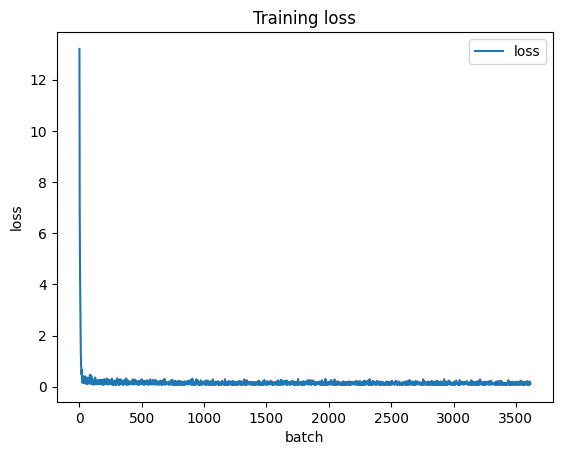

In [ ]:
import matplotlib.pyplot as plt

plt.plot(loss_history)
plt.title('Training loss')
plt.ylabel('loss')
plt.xlabel('batch')
plt.legend(['loss'], loc='upper right')
plt.show()

In [ ]:
model_to_save = model.module if hasattr(model, 'module') else model
model_to_save.save_pretrained("/content/gdrive/Shareddrives/anzi/B/model")

In [ ]:
from transformers import BertTokenizer, BertForMaskedLM

tokenizer = BertTokenizer.from_pretrained(PLM)
model = BertForMaskedLM.from_pretrained("/content/gdrive/Shareddrives/anzi/B/model")
model.eval()

In [ ]:
questions = {
    "q1": {
        "sentence": "To make Jane live a [MASK] life, Mother was very careful about spending money. [SEP] happy",
        "answer": "happy",
        "distractors": ["poor", "busy", "sad"]
    },
    "q2": {
        "sentence": "[MASK] , Jane didn't understand her. [SEP] However",
        "answer": "However",
        "distractors": ["Though", "Although", "Or"]
    },
    "q3": {
        "sentence": "Every day Mother was busy with her [MASK] while Jane was studying at school, so they had little time to enjoy themselves. [SEP] work",
        "answer": "work",
        "distractors": ["writing", "housework", "research"]
    },
    "q4": {
        "sentence": "One day, Mother realized Jane was unhappy and even [MASK] to her. [SEP] unfriendly",
        "answer": "unfriendly",
        "distractors": ["loyal", "kind", "cruel"]
    },
    "q5": {
        "sentence": "The old man was waiting for a ride across the [MASK] . [SEP] river",
        "answer": "river",
        "distractors": ["town", "country", "island"]
    },
    "q6": {
        "sentence": "I felt uncomfortable and out of place as the professor carefully [MASK] what she expected us to learn. [SEP] explained",
        "answer": "explained",
        "distractors": ["showed", "designed", "offered"]
    },
    "q7": {
        "sentence": "As I listened, I couldn't help but [MASK] of my own oldest daughter. [SEP] think",
        "answer": "think",
        "distractors": ["speak", "talk", "hear"]
    },
    "q8": {
        "sentence": "As we were [MASK] on the third floor for old people with Alzheimer, most of them stared off at the walls or floor. [SEP] singing",
        "answer": "singing",
        "distractors": ["meeting", "gathering", "dancing"]
    },
    "q9": {
        "sentence": "As we got [MASK] with each song, she did as well. [SEP] louder",
        "answer": "louder",
        "distractors": ["higher", "nearer", "faster"]
    },
    "q10": {
        "sentence": "Mr. Petri, [MASK] injured in the fire, was rushed to hospital. [SEP] seriously",
        "answer": "seriously",
        "distractors": ["blindly", "hardly", "slightly"]
    },
    "q11": {
        "sentence": "If an object is attracted to a magnet, the object is most likely made of [MASK]. [SEP] metal",
        "answer": "metal",
        "distractors": ["wood", "plastic", "cardboard"]
    },
    "q12": {
        "sentence": "the main organs of the respiratory system are [MASK]. [SEP] lungs",
        "answer": "lungs",
        "distractors": ["ovaries", "intestines", "kidneys"]
    },
    "q13": {
        "sentence": "The products of photosynthesis are glucose and [MASK] else. [SEP] oxygen",
        "answer": "oxygen",
        "distractors": ["carbon", "hydrogen", "nitrogen"]
    },
    "q14": {
        "sentence": "frogs have [MASK] eyelid membranes. [SEP] three",
        "answer": "three",
        "distractors": ["two", "four", "one"]
    },
    "q15": {
        "sentence": "the only known planet with large amounts of water is [MASK]. [SEP] earth",
        "answer": "earth",
        "distractors": ["saturn", "jupiter", "mars"]
    },
    "q16": {
        "sentence": "[MASK] is responsible for erosion by flowing water and glaciers. [SEP] gravity",
        "answer": "gravity",
        "distractors": ["kinetic", "electromagnetic", "weight"],
    },
    "q17": {
        "sentence": "Common among mammals and insects , pheromones are often related to [MASK] type of behavior. [SEP] reproductive",
        "answer": "reproductive",
        "distractors": ["aggressive", "immune", "cardiac"]
    },
    "q18": {
        "sentence": "[MASK] can reproduce by infecting the cell of a living host. [SEP] virus",
        "answer": "virus",
        "distractors": ["bacteria", "mucus", "carcinogens"]
    },
    "q19": {
        "sentence": "proteins are encoded by [MASK]. [SEP] genes",
        "answer": "genes",
        "distractors": ["DNA", "RNA", "codons"]
    },
    "q20": {
        "sentence": "Producers at the base of ecological food webs are also known as [MASK]. [SEP] autotrophic",
        "answer": "autotrophic",
        "distractors": ["endoscopic", "symbiotic", "mutualistic"],
    },
    "q21": {
        "sentence": "Today morning, I saw a [MASK] sitting on the wall. [SEP] cat",
        "answer": "cat",
        "distractors": [],
    },
    "q22": {
        "sentence": "Ukrainian presidential adviser says situation is ' [MASK] control' in suburbs and outskirts of Kyiv. [SEP] under",
        "answer": "under",
        "distractors": [],
    },
    "q23": {
        "sentence": "I don't think that after what is [MASK] now, Ukraine has weak positions. [SEP] happening",
        "answer": "happening",
        "distractors": [],
    },
    "q24": {
        "sentence": "Circular shapes are also stronger and resist deformation, and therefore can [MASK] extreme differences in pressure inside and outside of an aircraft. [SEP] tolerate",
        "answer": "tolerate",
        "distractors": [],
    },
    "q25": {
        "sentence": "Bobby cared a lot about his [MASK] at home and asked his parents not to go through his things without his permission. [SEP] privacy",
        "answer": "privacy",
        "distractors": [],
    }
}

In [ ]:
from transformers import pipeline

unmasker = pipeline("fill-mask", tokenizer=tokenizer, model=model, top_k=10)

In [ ]:
unmasker(questions["q24"]["sentence"])

[{'score': 0.03046746365725994,
  'token': 8568,
  'token_str': 'ignore',
  'sequence': 'circular shapes are also stronger and resist deformation, and therefore can ignore extreme differences in pressure inside and outside of an aircraft. tolerate'},
 {'score': 0.027179785072803497,
  'token': 3623,
  'token_str': 'increase',
  'sequence': 'circular shapes are also stronger and resist deformation, and therefore can increase extreme differences in pressure inside and outside of an aircraft. tolerate'},
 {'score': 0.022746169939637184,
  'token': 16014,
  'token_str': 'predict',
  'sequence': 'circular shapes are also stronger and resist deformation, and therefore can predict extreme differences in pressure inside and outside of an aircraft. tolerate'},
 {'score': 0.017113694921135902,
  'token': 2491,
  'token_str': 'control',
  'sequence': 'circular shapes are also stronger and resist deformation, and therefore can control extreme differences in pressure inside and outside of an aircra

In [ ]:
unmasker(questions["q25"]["sentence"])

[{'score': 0.11980657279491425,
  'token': 2155,
  'token_str': 'family',
  'sequence': 'bobby cared a lot about his family at home and asked his parents not to go through his things without his permission. privacy'},
 {'score': 0.03588053211569786,
  'token': 2814,
  'token_str': 'friends',
  'sequence': 'bobby cared a lot about his friends at home and asked his parents not to go through his things without his permission. privacy'},
 {'score': 0.0346313938498497,
  'token': 2925,
  'token_str': 'future',
  'sequence': 'bobby cared a lot about his future at home and asked his parents not to go through his things without his permission. privacy'},
 {'score': 0.027893584221601486,
  'token': 2740,
  'token_str': 'health',
  'sequence': 'bobby cared a lot about his health at home and asked his parents not to go through his things without his permission. privacy'},
 {'score': 0.0271416287869215,
  'token': 2147,
  'token_str': 'work',
  'sequence': 'bobby cared a lot about his work at home

In [ ]:
from tqdm import tqdm
import os
from transformers import RobertaTokenizer, RobertaForMaskedLM, pipeline
import numpy as np
import fasttext
import nltk
from nltk.tokenize import word_tokenize
import json


# Global variables
CSG_MODEL = "./cdgp-csg-roberta1-dgen"
DS_MODEL = "/kaggle/working/cdgp-ds-fasttext/cdgp-ds-fasttext.bin"
DATASET = "./CLOTH/CLOTH_test_cleaned.json"
RESULT = "roberta_CLOTH(k=10)"
TOP_K = 10
STOP_WORDS = ["[MASK]", "[SEP]", "[PAD]", "[CLS]"]
WEIGHT = {"s0": 0.6, "s1": 0.15, "s2": 0.15, "s3": 0.1}
# WEIGHT = {"s0": 0.25, "s1": 0.25, "s2": 0.25, "s3": 0.25}
QUESTION_LIMIT = 500


def main():
    # Load CSG model
    print(f"Load CSG model at {CSG_MODEL}...")
    tokenizer = RobertaTokenizer.from_pretrained("AndyChiang/cdgp-csg-roberta-cloth")
    csg_model = RobertaForMaskedLM.from_pretrained("AndyChiang/cdgp-csg-roberta-cloth")

    # Create a unmasker
    unmasker = pipeline('fill-mask', tokenizer=tokenizer, model=csg_model, top_k=TOP_K)

    # Load DS model
    print(f"Load DS model at {DS_MODEL}...")
    ds_model = fasttext.load_model(DS_MODEL)

    # Load test dataset
    print(f"Test dataset at {DATASET}...")
    with open(DATASET, "r") as file:
        questions = json.load(file)

    # Generate distractors
    print("Generate distractors...")
    dis_results = list()
    i = 0
    for question in tqdm(questions):
        sent = question["sentence"].replace("[MASK]", "<mask>").replace("\n", "")
        answer = question["answer"]
        result = generate_dis(unmasker, ds_model, sent, answer)
        dis_result = {"distractors": question["distractors"], "generations": result}
        dis_results.append(dis_result)

        i += 1
        if i == QUESTION_LIMIT:
            break

    # Save result
    print(f"Save to 'result_{RESULT}.json'..")
    with open(f"./results/result_{RESULT}.json", "w") as file:
        json.dump(dis_results, file)

    print("Done!")


# Generate distractors of one question
def generate_dis(unmasker, ds_model, sent, answer):
    # Answer relating
    target_sent = sent + " </s> " + answer

    # Generate Candidate Set
    cs = list()
    for cand in unmasker(target_sent):
        word = cand["token_str"].replace(" ", "").replace("\n", "")
        if len(word) > 0:   # Skip empty
            cs.append({"word": word, "s0": cand["score"], "s1": 0.0, "s2": 0.0, "s3": 0.0})

    # Confidence Score s0
    s0s = [c["s0"] for c in cs]
    new_s0s = min_max_y(s0s)

    for i, c in enumerate(cs):
        c["s0"] = new_s0s[i]

    # Word Embedding Similarity s1
    answer_vector = ds_model.get_word_vector(answer)
    word_similarities = list()
    for c in cs:
        c_vector = ds_model.get_word_vector(c["word"])
        word_similarity = similarity(answer_vector, c_vector)   # Cosine similarity between A and Di
        word_similarities.append(word_similarity)

    new_similarities = min_max_y(word_similarities)

    for i, c in enumerate(cs):
        # print(c["word"], 1-word_similarities[i], 1-new_similarities[i])
        c["s1"] = 1-new_similarities[i]

    # Contextual-Sentence Embedding Similarity s2
    correct_sent = sent.replace('<mask>', answer)
    correct_sent_vector = ds_model.get_sentence_vector(correct_sent)

    cand_sents = list()
    for c in cs:
        cand_sents.append(sent.replace('<mask>', c["word"]))

    sent_similarities = list()
    for cand_sent in cand_sents:
        cand_sent_vector = ds_model.get_sentence_vector(cand_sent)
        sent_similarity = similarity(correct_sent_vector, cand_sent_vector) # Cosine similarity between S(A) and S(Di)
        sent_similarities.append(sent_similarity)

    new_similarities = min_max_y(sent_similarities)
    for i, c in enumerate(cs):
        # print(cand_sents[i], 1-sent_similarities[i], 1-new_similarities[i])
        c["s2"] = 1-new_similarities[i]

    # POS match score s3
    origin_token = word_tokenize(sent)
    origin_token.remove("<")
    origin_token.remove(">")

    mask_index = origin_token.index("mask")

    correct_token = word_tokenize(correct_sent)
    correct_pos = nltk.pos_tag(correct_token)
    answer_pos = correct_pos[mask_index]    # POS of A

    for i, c in enumerate(cs):
        cand_sent_token = word_tokenize(cand_sents[i])
        cand_sent_pos = nltk.pos_tag(cand_sent_token)
        cand_pos = cand_sent_pos[mask_index]    # POS of Di

        if cand_pos[1] == answer_pos[1]:
            c["s3"] = 1.0
        else:
            c["s3"] = 0.0

    # Weighted final score
    cs_rank = list()
    for c in cs:
        fs = WEIGHT["s0"]*c["s0"] + WEIGHT["s1"]*c["s1"] + WEIGHT["s2"]*c["s2"] + WEIGHT["s3"]*c["s3"]
        cs_rank.append((c["word"], fs))

    # Rank by final score
    cs_rank.sort(key = lambda x: x[1], reverse=True)

    # Top K
    result = [d[0] for d in cs_rank[:TOP_K]]

    return result


# Cosine similarity
def similarity(v1, v2):
    n1 = np.linalg.norm(v1)
    n2 = np.linalg.norm(v2)
    if n1 == 0 or n2 == 0:
        return 1
    else:
        return np.dot(v1, v2) / (n1 * n2)


# Min–max normalization
def min_max_y(raw_data):
    min_max_data = []

    # Min–max normalization
    for d in raw_data:
        try:
            min_max_data.append((d - min(raw_data)) / (max(raw_data) - min(raw_data)))
        except ZeroDivisionError:
            min_max_data.append(1)

    return min_max_data


if __name__ == "__main__":
    print("Distractor Generator (RoBERTa) Start!")
    main()